# Kaggle Challenge

#### Ashton Prescott and Juan Lucena Fois

## PART I

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jlucenaf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jlucenaf/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jlucenaf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/jlucenaf/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

### Section A

##### a)

In [2]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('training_data.xlsx')

# Decode the 'full_text' column
df['decoded_text'] = df['full_text'].apply(lambda x: x.encode().decode('unicode_escape') if isinstance(x, str) else '')

# Calculate tweet length metrics
df['tweet_characters'] = df['decoded_text'].apply(len)
df['tweet_words'] = df['decoded_text'].apply(lambda x: len(x.split()))

# Process hashtags column
df['hashtag_list'] = df['hashtags'].apply(lambda x: x.split() if isinstance(x, str) else [])
df['hashtag_characters'] = df['hashtag_list'].apply(lambda tags: sum(len(tag) for tag in tags))
df['hashtag_words'] = df['hashtag_list'].apply(len)

# Generate descriptive statistics
summary = {
    'Metric': ['Tweet Characters', 'Tweet Words', 'Hashtag Characters', 'Hashtag Words'],
    'Minimum': [
        df['tweet_characters'].min(), df['tweet_words'].min(),
        df['hashtag_characters'].min(), df['hashtag_words'].min()
    ],
    'Average': [
        df['tweet_characters'].mean(), df['tweet_words'].mean(),
        df['hashtag_characters'].mean(), df['hashtag_words'].mean()
    ],
    'Median': [
        df['tweet_characters'].median(), df['tweet_words'].median(),
        df['hashtag_characters'].median(), df['hashtag_words'].median()
    ],
    'Maximum': [
        df['tweet_characters'].max(), df['tweet_words'].max(),
        df['hashtag_characters'].max(), df['hashtag_words'].max()
    ]
}

summary_df = pd.DataFrame(summary)

# Display the summary table
print(summary_df)

               Metric  Minimum     Average  Median  Maximum
0    Tweet Characters        4  147.178077   145.0      873
1         Tweet Words        1   20.297640    20.0       89
2  Hashtag Characters        0    4.215364     0.0      130
3       Hashtag Words        0    0.492197     0.0       16


##### b)

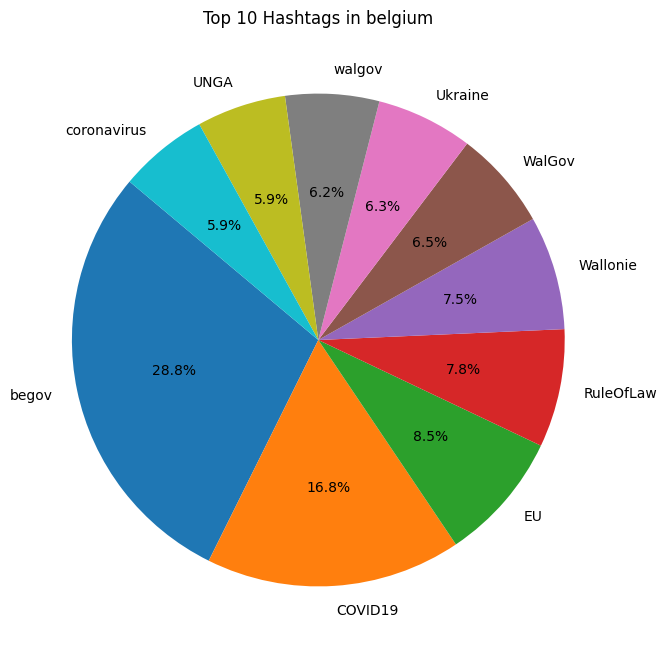

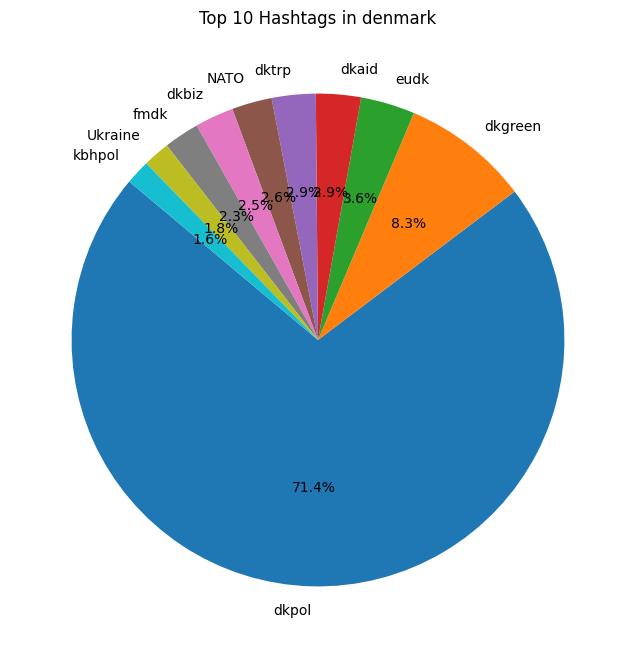

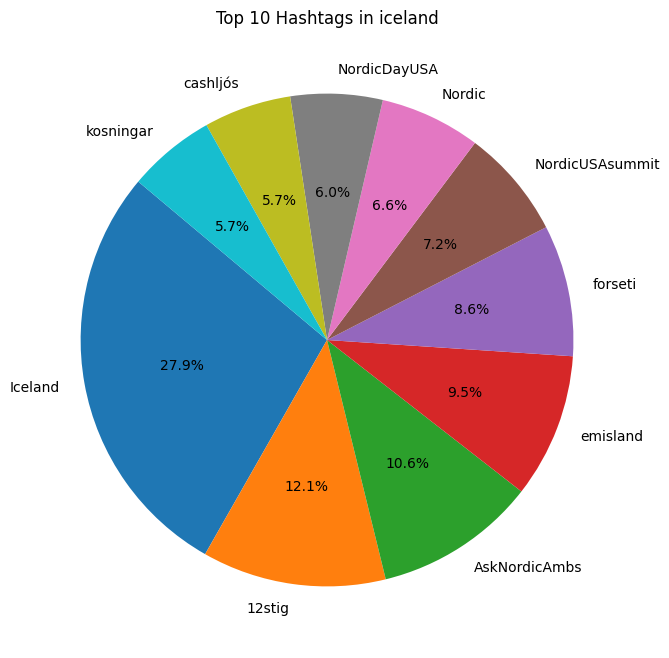

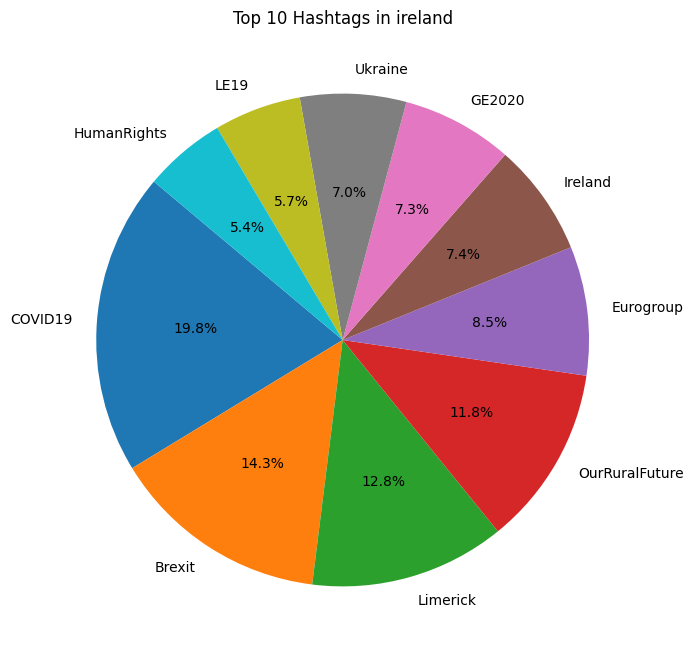

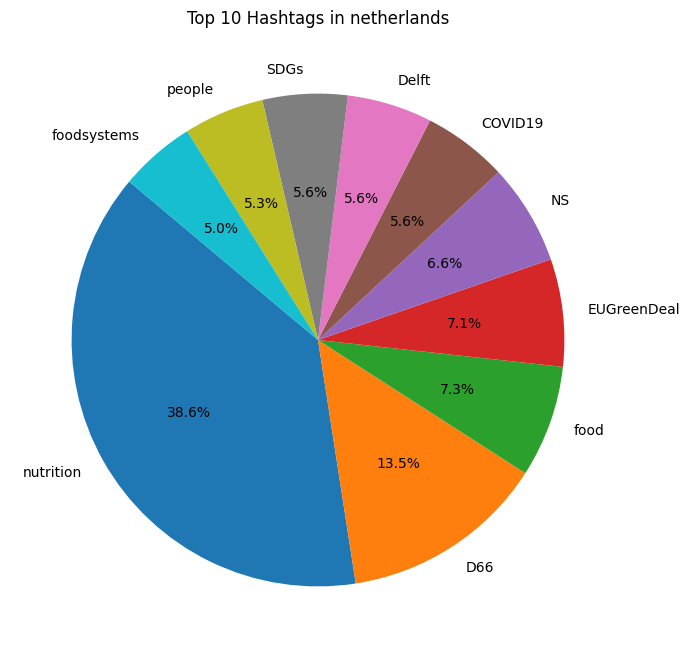

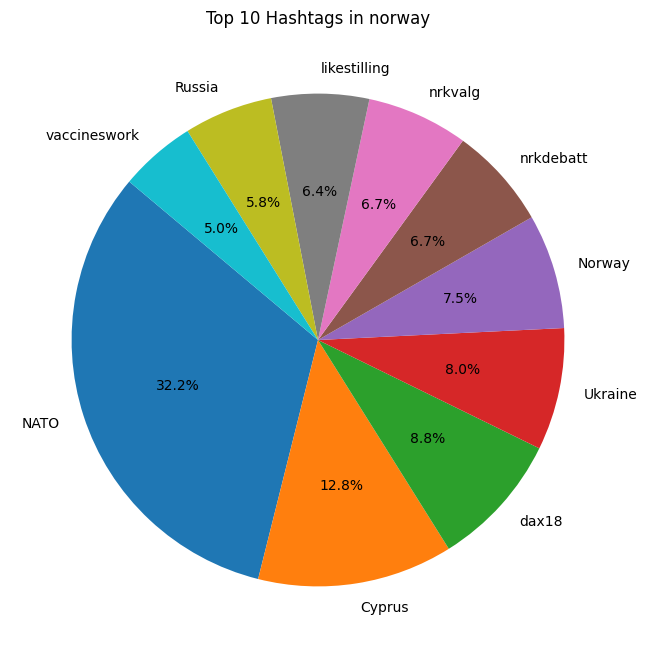

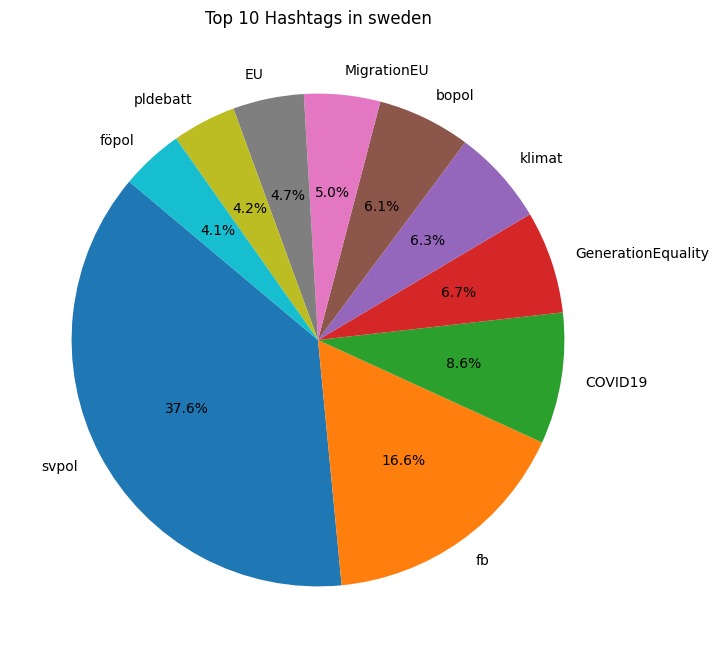

In [3]:
import matplotlib.pyplot as plt
from collections import Counter

# Dictionary to store the top 10 hashtags by country
top_hashtags_by_country = {}

# Group by country and count hashtags
for country, group in df.groupby('country_user'):
    # Flatten the list of hashtags for this country
    all_hashtags = [hashtag for hashtags in group['hashtag_list'] for hashtag in hashtags]
    
    # Count the occurrences of each hashtag
    hashtag_counts = Counter(all_hashtags)
    
    # Get the top 10 hashtags
    top_10 = hashtag_counts.most_common(10)
    top_hashtags_by_country[country] = top_10

    # Prepare data for pie chart
    labels, values = zip(*top_10)
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f"Top 10 Hashtags in {country}")
    plt.show()

##### c)

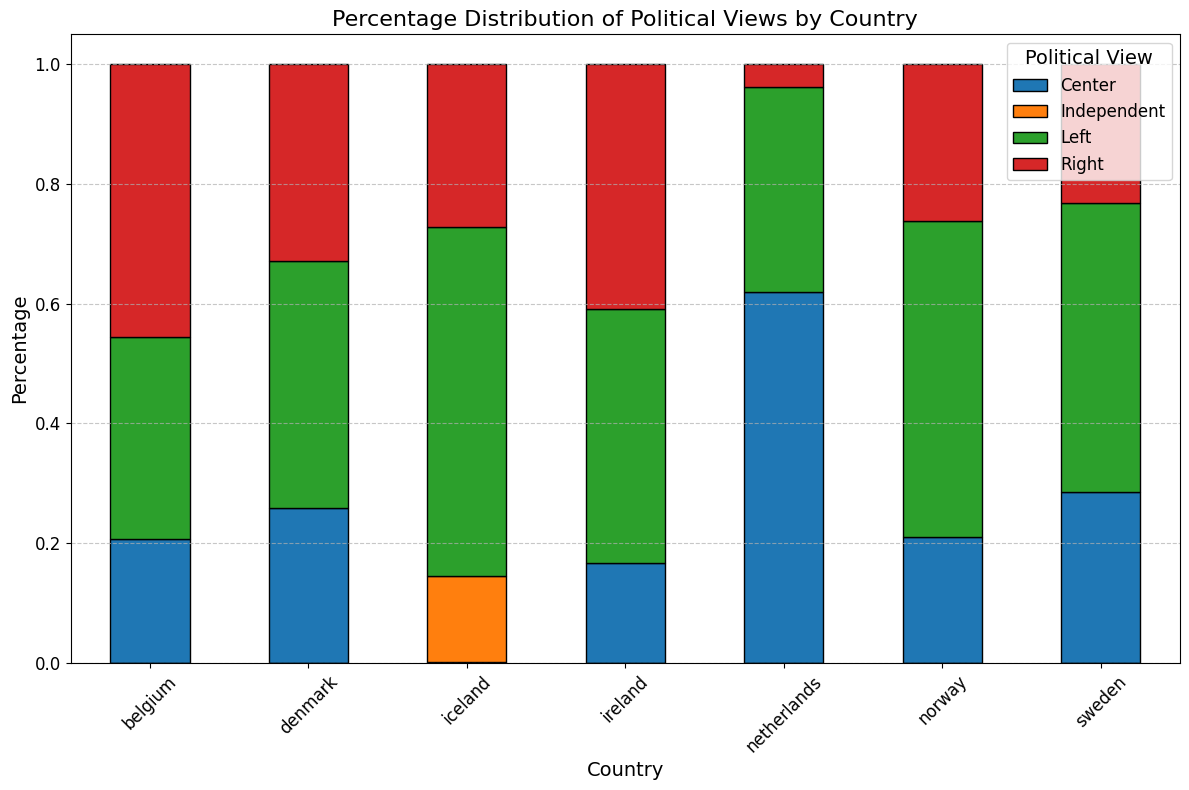

In [4]:
# Group by country and political view, calculate counts
political_views_by_country = df.groupby(['country_user', 'pol_spec_user']).size().unstack(fill_value=0)

# Normalize the counts to calculate percentages
political_views_percentages = political_views_by_country.div(political_views_by_country.sum(axis=1), axis=0)

# Plot the stacked bar chart
ax = political_views_percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    edgecolor='black'
)

# Add titles and labels
plt.title('Percentage Distribution of Political Views by Country', fontsize=16)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add legend and grid
plt.legend(title='Political View', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

##### d)

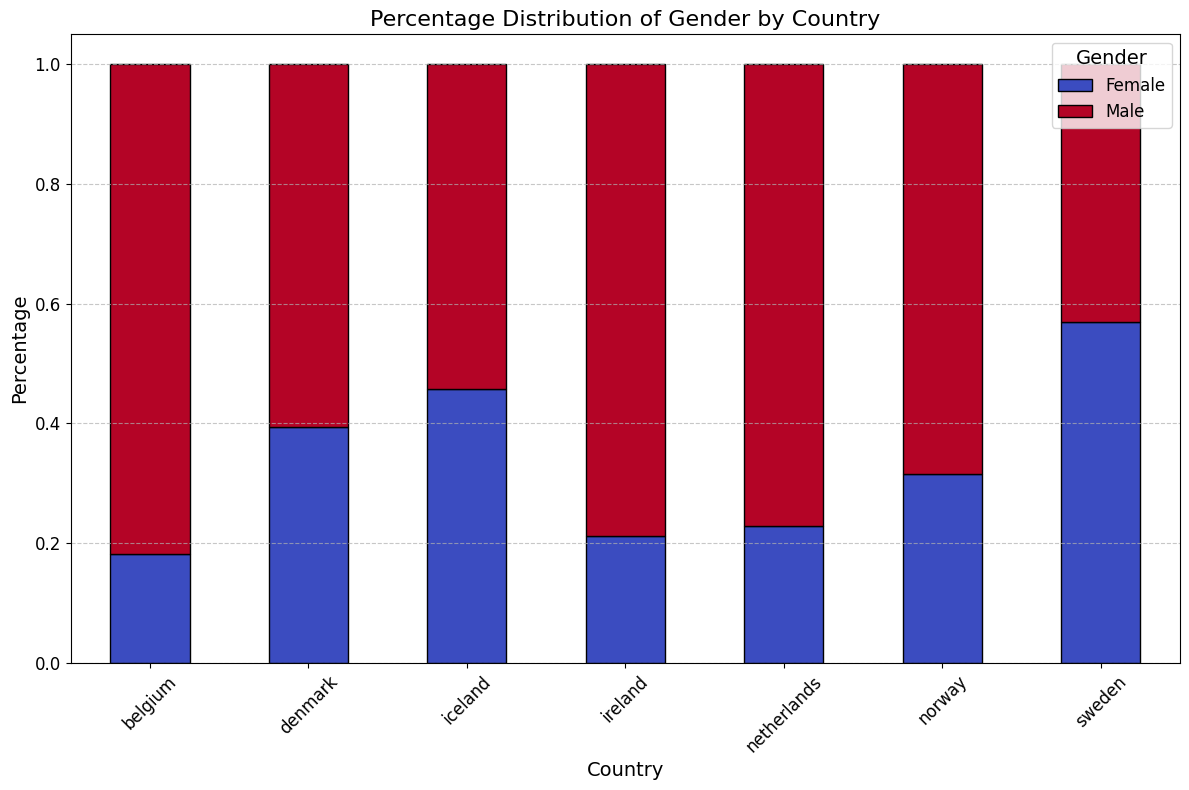

In [5]:
# Group by country and gender, calculate counts
gender_by_country = df.groupby(['country_user', 'gender_user']).size().unstack(fill_value=0)

# Normalize the counts to calculate percentages
gender_percentages = gender_by_country.div(gender_by_country.sum(axis=1), axis=0)

# Plot the stacked bar chart
ax = gender_percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    cmap='coolwarm',  # Use a distinct colormap for genders
    edgecolor='black'
)

# Add titles and labels
plt.title('Percentage Distribution of Gender by Country', fontsize=16)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add legend and grid
plt.legend(title='Gender', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


### Section B

##### a)

In [6]:
# Import the lemmatization function from lemmatizer.py
from lemmatizer import lemmatize_tweet

# import pandas as pd
# from langdetect import detect
# from langdetect.lang_detect_exception import LangDetectException
# from googletrans import Translator

# translator = Translator()

# # Function to detect language safely
# def detect_language_safe(text):
#     try:
#         return detect(text)
#     except LangDetectException:
#         return "unknown"

# # Add language detection
# df['lang'] = df['decoded_text'].apply(detect_language_safe)

# # Translate and analyze sentiment
# def translate_and_analyze(tweet, lang):
#     if lang != 'en' and lang != "unknown":  # Translate only if not English and language is detected
#         tweet = translator.translate(tweet, src=lang, dest='en').text

# # Translate tweet
# df['translated_text'] = df.apply(lambda row: translate_and_analyze(row['decoded_text'], row['lang']), axis=1)

# Apply the lemmatizer function to the full_text (decoded_text) column
df['text_clean'] = df['decoded_text'].apply(lemmatize_tweet)

# Calculate the number of characters and words for the cleaned text
df['clean_text_characters'] = df['text_clean'].apply(len)
df['clean_text_words'] = df['text_clean'].apply(lambda x: len(x.split()))

# Expand the summary table with statistics for the cleaned text
summary['Metric'].extend(['Clean Text Characters', 'Clean Text Words'])
summary['Minimum'].extend([
    df['clean_text_characters'].min(), 
    df['clean_text_words'].min()
])
summary['Average'].extend([
    df['clean_text_characters'].mean(), 
    df['clean_text_words'].mean()
])
summary['Median'].extend([
    df['clean_text_characters'].median(), 
    df['clean_text_words'].median()
])
summary['Maximum'].extend([
    df['clean_text_characters'].max(), 
    df['clean_text_words'].max()
])

# Convert the expanded summary into a DataFrame
expanded_summary_df = pd.DataFrame(summary)

# Display the expanded summary table
print(expanded_summary_df)
# Export the results to a CSV file
df.to_csv('clean_train.csv', index=False, header=1)


                  Metric  Minimum     Average  Median  Maximum
0       Tweet Characters        4  147.178077   145.0      873
1            Tweet Words        1   20.297640    20.0       89
2     Hashtag Characters        0    4.215364     0.0      130
3          Hashtag Words        0    0.492197     0.0       16
4  Clean Text Characters        0   87.928413    83.0      272
5       Clean Text Words        0   12.468370    12.0       56


##### b)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

# Vectorize the cleaned text using TF-IDF and CountVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tf_vectorizer = CountVectorizer(max_features=5000, stop_words='english')

# Create TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_clean'])

# Create term frequency matrix
tf_matrix = tf_vectorizer.fit_transform(df['text_clean'])

# Define the number of topics
n_topics = 10

# Perform Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topics = lda.fit_transform(tf_matrix)

# Perform Non-negative Matrix Factorization (NMF)
nmf = NMF(n_components=n_topics, random_state=42)
nmf_topics = nmf.fit_transform(tfidf_matrix)

# Function to display top words for each topic
def display_topics(model, feature_names, num_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        topics[f"Topic {topic_idx+1}"] = top_words
    return pd.DataFrame.from_dict(topics, orient='index', columns=[f"Word {i+1}" for i in range(num_words)])

# Display top words for LDA
print("Top words for each LDA topic:")
lda_topics_df = display_topics(lda, tf_vectorizer.get_feature_names_out())
display(lda_topics_df)

# Display top words for NMF
print("Top words for each NMF topic:")
nmf_topics_df = display_topics(nmf, tfidf_vectorizer.get_feature_names_out())
display(nmf_topics_df)

Top words for each LDA topic:


,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Topic 1,fra,min,trump,2017,ukraine,til,usa,brexit,med,dagens
Topic 2,need,people,today,support,work,new,make,country,climate,world
Topic 3,det,til,med,som,har,ikke,jeg,men,kan,dag
Topic 4,today,minister,great,new,day,president,year,forward,meeting,meet
Topic 5,til,dkpol,med,tak,den,det,har,jeg,dag,godt
Topic 6,van,het,een,voor,meet,dat,aan,niet,die,zijn
Topic 7,pour,les,le,sur,une,avec,que,dans,qui,est
Topic 8,human,2020,right,public,2021,2015,iran,love,time,dont
Topic 9,det,ikke,der,til,har,med,jeg,skal,men,kan
Topic 10,och,att,det,som,med,till,inte,har,ett,den


Top words for each NMF topic:


,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Topic 1,det,var,men,blir,inte,ogs,helt,godt,att,eller
Topic 2,van,het,een,voor,meet,dat,aan,niet,zijn,die
Topic 3,och,att,till,inte,ett,jag,ska,frn,sverige,den
Topic 4,til,dkpol,fra,tak,alle,dag,skal,lykke,god,tillykke
Topic 5,med,dag,sammen,gratulerer,fra,dkpol,bgratulerer,mte,dagen,tillsammans
Topic 6,har,dag,jeg,ftt,gjort,vret,vrt,han,mange,fet
Topic 7,pour,les,le,sur,une,avec,dans,que,qui,est
Topic 8,ikke,jeg,der,men,den,kan,skal,dkpol,vil,fra
Topic 9,today,new,minister,work,great,support,need,meet,people,year
Topic 10,som,den,ett,inte,var,mot,alla,kan,vill,till


## PART II

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.preprocessing import LabelEncoder
import torch
import pandas as pd

train_data = pd.read_csv("clean_train.csv")
test_data = pd.read_excel("test_data.xlsx")
train_data['text_clean'] = train_data['text_clean'].fillna("").astype(str)
test_data['full_text'] = test_data['full_text'].fillna("").astype(str)

# Encode labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data['pol_spec_user'])

# Load tokenizer and model
model_name = "xlm-roberta-base"  # You can use "bert-base-multilingual-cased" too
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(label_encoder.classes_))

# Tokenize the text
train_encodings = tokenizer(list(train_data['text_clean']), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_data['full_text']), truncation=True, padding=True, max_length=128)

# Convert to PyTorch Dataset
class TweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

train_dataset = TweetDataset(train_encodings, train_labels)

# Train the model
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
)

trainer.train()


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  1%|          | 500/76359 [01:48<4:32:32,  4.64it/s] 

{'loss': 1.1449, 'grad_norm': 2.1872525215148926, 'learning_rate': 5e-05, 'epoch': 0.02}


  1%|▏         | 1000/76359 [03:39<4:30:19,  4.65it/s]

{'loss': 1.102, 'grad_norm': 2.8129868507385254, 'learning_rate': 4.967044121330363e-05, 'epoch': 0.04}


  2%|▏         | 1500/76359 [05:30<4:27:47,  4.66it/s]

{'loss': 1.0994, 'grad_norm': 5.049854755401611, 'learning_rate': 4.934088242660726e-05, 'epoch': 0.06}


  3%|▎         | 2000/76359 [07:21<4:29:29,  4.60it/s]

{'loss': 1.0906, 'grad_norm': 1.0528231859207153, 'learning_rate': 4.901132363991089e-05, 'epoch': 0.08}


  3%|▎         | 2500/76359 [09:11<4:24:44,  4.65it/s]

{'loss': 1.0972, 'grad_norm': 1.7807191610336304, 'learning_rate': 4.868176485321452e-05, 'epoch': 0.1}


  4%|▍         | 3000/76359 [11:02<4:23:24,  4.64it/s]

{'loss': 1.0925, 'grad_norm': 4.258152484893799, 'learning_rate': 4.8352206066518145e-05, 'epoch': 0.12}


  5%|▍         | 3500/76359 [12:53<4:21:03,  4.65it/s]

{'loss': 1.0968, 'grad_norm': 1.5987361669540405, 'learning_rate': 4.802264727982178e-05, 'epoch': 0.14}


  5%|▌         | 4000/76359 [14:44<4:19:24,  4.65it/s]

{'loss': 1.0936, 'grad_norm': 1.735531210899353, 'learning_rate': 4.7693088493125404e-05, 'epoch': 0.16}


  6%|▌         | 4500/76359 [16:34<4:10:49,  4.77it/s]

{'loss': 1.0958, 'grad_norm': 2.1739463806152344, 'learning_rate': 4.736352970642903e-05, 'epoch': 0.18}


In [10]:
print(f"Number of labels: {len(label_encoder.classes_)}")
print(f"Model's classification head: {model.classifier}")
print(train_data['pol_spec_user'].unique())


Number of labels: 4
Model's classification head: XLMRobertaClassificationHead(
  (dense): Linear(in_features=768, out_features=768, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (out_proj): Linear(in_features=768, out_features=4, bias=True)
)
['Left' 'Right' 'Center' 'Independent']


In [ ]:

# Predict on test data
test_encodings = tokenizer(list(test_data['full_text']), truncation=True, padding=True, max_length=128)
test_dataset = TweetDataset(test_encodings, [0] * len(test_data))  # Dummy labels for inference

predictions = trainer.predict(test_dataset)

TypeError: argmax(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [ ]:
import torch

# Decode predictions
predicted_classes = label_encoder.inverse_transform(
    torch.argmax(torch.tensor(predictions.predictions), axis=1).numpy()
)
test_data['pol_spec_user'] = predicted_classes

test_data[["Id", "pol_spec_user"]].to_csv("test_output.csv", index=False, header=1)

In [12]:
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

# Prepare a small artificial dataset
small_train_data = {
    "text_clean": [
        "The government is corrupt",  # Clearly 'Left'
        "Tax cuts are great",         # Clearly 'Right'
        "The economy is growing",     # Clearly 'Center'
        "Healthcare is a right",      # Clearly 'Left'
        "The president is amazing",   # Clearly 'Right'
        "We need bipartisan solutions" # Clearly 'Center'
    ],
    "pol_spec_user": [
        "Left",
        "Right",
        "Center",
        "Left",
        "Right",
        "Center"
    ]
}
small_train_df = pd.DataFrame(small_train_data)

# Encode the labels
label_encoder = LabelEncoder()
small_train_labels = label_encoder.fit_transform(small_train_df["pol_spec_user"])
print("Label classes:", label_encoder.classes_)  # ['Center', 'Left', 'Right']

# Load tokenizer and model
model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(label_encoder.classes_))

# Tokenize the text
small_train_encodings = tokenizer(
    list(small_train_df["text_clean"]),
    truncation=True,
    padding=True,
    max_length=128
)

# Create a dataset object
class TweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

small_train_dataset = TweetDataset(small_train_encodings, small_train_labels)

# Training arguments
small_training_args = TrainingArguments(
    output_dir="./small_test_results",
    num_train_epochs=20,  # Overfit this small dataset
    per_device_train_batch_size=2,
    logging_dir="./small_test_logs",
    learning_rate=5e-5
)

# Trainer
small_trainer = Trainer(
    model=model,
    args=small_training_args,
    train_dataset=small_train_dataset
)

# Train the model
small_trainer.train()

# Evaluate on the same dataset
predictions = small_trainer.predict(small_train_dataset)
predicted_classes = label_encoder.inverse_transform(
    torch.argmax(torch.tensor(predictions.predictions), axis=1).numpy()
)

# Print results
print("True labels:    ", small_train_df["pol_spec_user"].tolist())
print("Predicted labels:", predicted_classes.tolist())

Label classes: ['Center' 'Left' 'Right']


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 60/60 [00:17<00:00,  3.46it/s]       


{'train_runtime': 17.3232, 'train_samples_per_second': 6.927, 'train_steps_per_second': 3.464, 'train_loss': 0.8947028477986654, 'epoch': 20.0}


100%|██████████| 1/1 [00:00<00:00, 407.49it/s]

True labels:     ['Left', 'Right', 'Center', 'Left', 'Right', 'Center']
Predicted labels: ['Left', 'Right', 'Center', 'Left', 'Right', 'Right']
